In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#######################################

# Sección de parámetros de entrada
B0 = 10.0
Bn = 10.0
L = 10.0
l = 0.5
b = 0.5
hk = 0.5  # Parámetro h/k
theta0 = 10.0
thetan = 10.0

########################################
N = 200   # Número de nodos


def B(B0,Bn,b,L,N):
    x = np.linspace(0,L,N)
    funcion = np.zeros(len(x))
    funcion[np.where(x<=L/3)]=1
    
   # funcion = 2*x**2 +2  
    if (min(funcion) != b/2) or funcion[0] != B0 or funcion[N-1] != Bn:
        print('Función No valida')
        return 0
    return x,funcion
########################################




    


# Ejemplo a resover

----------------------------------------------------------------
------------------Polinomios de 3er orden-----------------------
Los polinomios para x < x0 :
       3          2
9.919 x + 0.2937 x - 0.9245 x + 0.15
-----------------------------------------
Los polinomios para x > x0 :
       3           2
1.046 x + 0.01472 x - 0.08739 x + 0.05932
----------------------------------------------------------------
----------------------------------------------------------------
                                                                
                                                                
----------------------------------------------------------------
------------------Polinomios de 4er orden-----------------------
Los polinomios para x < x0 :
      4         3        2
49.7 x + 1.914 x - 1.45 x - 0.6416 x + 0.15
       4           3         2
61.88 x + 0.08383 x - 1.806 x - 0.5878 x + 0.15
-----------------------------------------
Los polinomios para x > x0 :
       4  

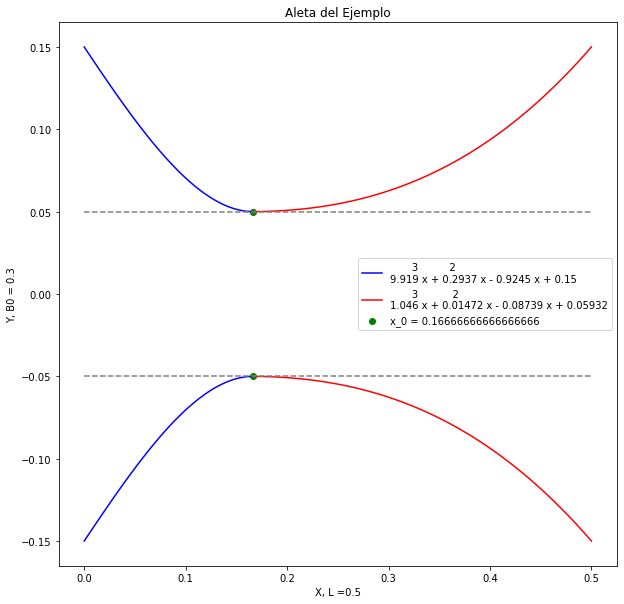

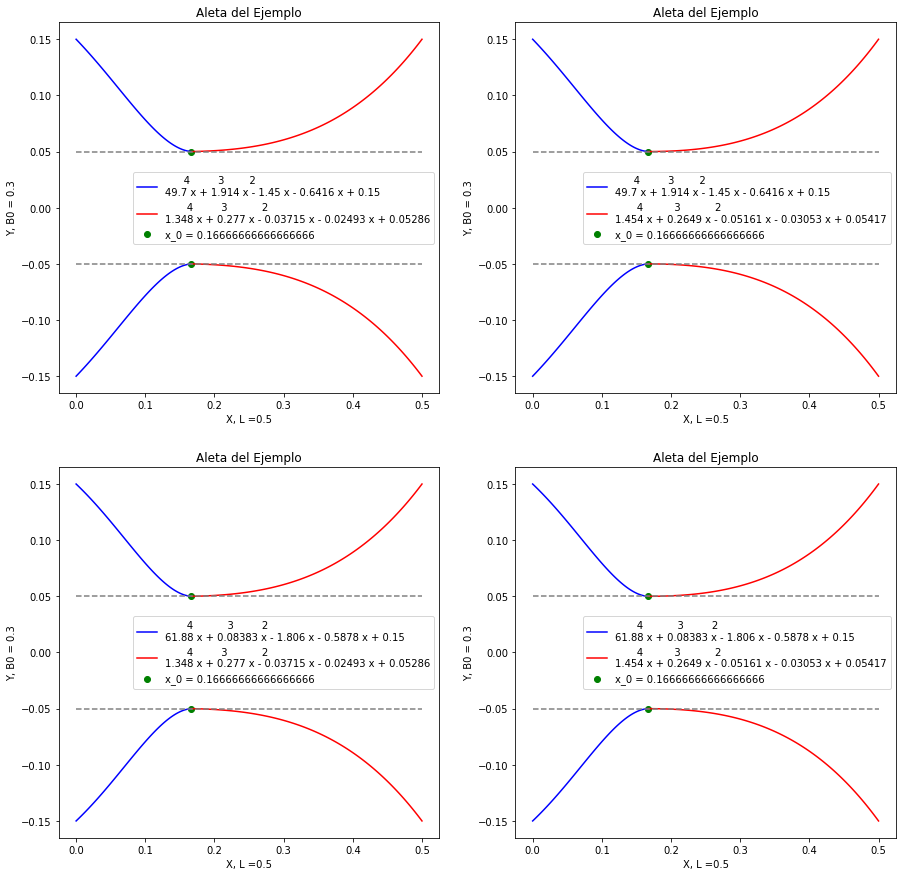

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


# Sección de parámetros de entrada
B0 = 0.3
Bn = 0.3
L = 0.5
l = 0.2
b = 0.1
hk = 0.5  # Parámetro h/k
theta0 = 10.0
thetan = 10.0

# parámetros adicionales
x0 = L/3;
N = 200   # Número de nodos

x = np.linspace(0,L,N)
delta = x[1]-x[0]

xi = np.linspace(0,x0,100)
xd = np.linspace(x0,L,100)
bb = np.ones(len(x))*b/2

# Función de la aleta a la izquierda de x0

# Rango de los puntos que forzan a crear una funcion cancava positiva 
rangoxi = np.linspace(0,x0,10)
rangoyi = np.linspace(b/2,B0/2,10)

rangoxd = np.linspace(x0,L,10)
rangoyd = np.linspace(b/2,Bn/2,10)


# Coeficientes polinomios de 3er orden 
coef_polinomios_izquierda_3r = []
coef_polinomios_derecha_3r = []


for i in rangoxi:
    i0 = np.array([0.0, i, x0])
    for j in rangoyi: 
        yi0 = np.array([B0/2, j , b/2])
        zi0 = np.polyfit(i0, yi0, 3, full=False)
        p0 = np.poly1d(zi0)
        if abs((p0(x0+delta)-p0(x0-delta))/(2*delta)) <= 0.05 and min(p0(xi))>=b/2:
            #coef_polinomios.append([p0[3],p0[2],p0[1],p0[0]])
            coef_polinomios_izquierda_3r.append(p0)
            
for i in rangoxd:
    i0 = np.array([x0, i, L])
    for j in rangoyd: 
        yi0 = np.array([b/2, j , Bn/2])
        zi0 = np.polyfit(i0, yi0, 3, full=False)
        p0 = np.poly1d(zi0)
        if abs((p0(x0+delta)-p0(x0-delta))/(2*delta)) <= 0.05 and min(p0(xd))>=b/2:
            #coef_polinomios.append([p0[3],p0[2],p0[1],p0[0]])
            coef_polinomios_derecha_3r.append(p0)
            
            
# Coeficientes polinomios de 4er orden 
coef_polinomios_izquierda_4r = []
coef_polinomios_derecha_4r = []


for i in rangoxi:
    i0 = np.array([0.0, i, x0])
    for j in rangoyi: 
        yi0 = np.array([B0/2, j , b/2])
        zi0 = np.polyfit(i0, yi0, 4, full=False)
        p0 = np.poly1d(zi0)
        if abs((p0(x0+delta)-p0(x0-delta))/(2*delta)) <= 0.05 and min(p0(xi))>=b/2:
            #coef_polinomios.append([p0[3],p0[2],p0[1],p0[0]])
            coef_polinomios_izquierda_4r.append(p0)
            
for i in rangoxd:
    i0 = np.array([x0, i, L])
    for j in rangoyd: 
        yi0 = np.array([b/2, j , Bn/2])
        zi0 = np.polyfit(i0, yi0, 4, full=False)
        p0 = np.poly1d(zi0)
        if abs((p0(x0+delta)-p0(x0-delta))/(2*delta)) <= 0.05 and min(p0(xd))>=b/2:
            #coef_polinomios.append([p0[3],p0[2],p0[1],p0[0]])
            coef_polinomios_derecha_4r.append(p0)
            


print('----------------------------------------------------------------')              
print('------------------Polinomios de 3er orden-----------------------')
print('Los polinomios para x < x0 :')
for i in range(0,len(coef_polinomios_izquierda_3r)):
    print(coef_polinomios_izquierda_3r[i])
print('-----------------------------------------')
print('Los polinomios para x > x0 :')
for i in range(0,len(coef_polinomios_derecha_3r)):
    print(coef_polinomios_derecha_3r[i])
print('----------------------------------------------------------------')  
print('----------------------------------------------------------------') 
print('                                                                ')
print('                                                                ')



for i in range(0,len(coef_polinomios_derecha_3r)):
    plt.figure(i,figsize=(10,10))
    plt.plot(xi,coef_polinomios_izquierda_3r[0](xi),c = 'blue',label='{}'.format(coef_polinomios_izquierda_3r[i]))
    plt.plot(xd,coef_polinomios_derecha_3r[i](xd),c = 'red',label='{}'.format(coef_polinomios_derecha_3r[i]))
    plt.plot(xi,-coef_polinomios_izquierda_3r[0](xi),c = 'blue')
    plt.plot(xd,-coef_polinomios_derecha_3r[i](xd),c = 'red')
    plt.plot(x,bb,ls ='--',c = 'gray')
    plt.plot(x,-bb,ls ='--',c= 'gray')
    plt.scatter(x0,b/2,c = 'green',label='x_0 = {}'.format(x0))
    plt.scatter(x0,-b/2,c= 'green')
    plt.title('Aleta del Ejemplo')
    plt.xlabel('X, L ={}'.format(L))
    plt.ylabel('Y, B0 = {}'.format(B0))
    plt.legend()
    
    
print('----------------------------------------------------------------')            
print('------------------Polinomios de 4er orden-----------------------')
print('Los polinomios para x < x0 :')
for i in range(0,len(coef_polinomios_izquierda_4r)):
    print(coef_polinomios_izquierda_4r[i])
print('-----------------------------------------')
print('Los polinomios para x > x0 :')
for i in range(0,len(coef_polinomios_derecha_4r)):
    print(coef_polinomios_derecha_4r[i])
print('----------------------------------------------------------------')  
print('----------------------------------------------------------------') 
print('                                                                ')
print('                                                                ')

for i in range(0,len(coef_polinomios_derecha_4r)):
    plt.figure(1,figsize=(15,15))
    plt.subplot(2,2,i+1)
    plt.plot(xi,coef_polinomios_izquierda_4r[0](xi),c = 'blue',label='{}'.format(coef_polinomios_izquierda_4r[0]))
    plt.plot(xd,coef_polinomios_derecha_4r[i](xd),c = 'red',label='{}'.format(coef_polinomios_derecha_4r[i]))
    plt.plot(xi,-coef_polinomios_izquierda_4r[0](xi),c = 'blue')
    plt.plot(xd,-coef_polinomios_derecha_4r[i](xd),c = 'red')
    plt.plot(x,bb,ls ='--',c = 'gray')
    plt.plot(x,-bb,ls ='--',c= 'gray')
    plt.scatter(x0,b/2,c = 'green',label='x_0 = {}'.format(x0))
    plt.scatter(x0,-b/2,c= 'green')
    plt.title('Aleta del Ejemplo')
    plt.xlabel('X, L ={}'.format(L))
    plt.ylabel('Y, B0 = {}'.format(B0))
    plt.legend()
    plt.subplot(2,2,i+3)
    plt.plot(xi,coef_polinomios_izquierda_4r[1](xi),c = 'blue',label='{}'.format(coef_polinomios_izquierda_4r[1]))
    plt.plot(xd,coef_polinomios_derecha_4r[i](xd),c = 'red',label='{}'.format(coef_polinomios_derecha_4r[i]))
    plt.plot(xi,-coef_polinomios_izquierda_4r[1](xi),c = 'blue')
    plt.plot(xd,-coef_polinomios_derecha_4r[i](xd),c = 'red')
    plt.plot(x,bb,ls ='--',c = 'gray')
    plt.plot(x,-bb,ls ='--',c= 'gray')
    plt.scatter(x0,b/2,c = 'green',label='x_0 = {}'.format(x0))
    plt.scatter(x0,-b/2,c= 'green')
    plt.title('Aleta del Ejemplo')
    plt.xlabel('X, L ={}'.format(L))
    plt.ylabel('Y, B0 = {}'.format(B0))
    plt.legend()




In [ ]:
for i in range (0,N):
    for j in range (0,N):
        if 
    
        
        

0.15000000000000002 -0.924485087252959 0.2937221650618362 9.919130150735507
